
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [225]:
import numpy as np
%pylab inline
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

Populating the interactive namespace from numpy and matplotlib


C:\Users\19785\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


In [226]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [227]:
#some useful code for plotting
# ax.plot(x_test, y_pred, 'blue', marker='o', )
# ax.plot(x_all, y_all, 'g')

## Answer
(a)

In [228]:
### (a)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
y_all = lr.predict(x_all)
mse

1204.249191317489

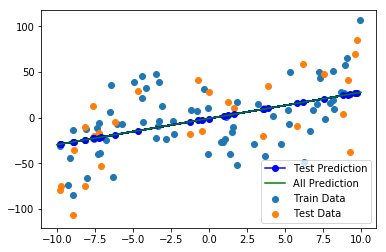

In [229]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax = plt.subplot()
ax.scatter(x_train, y_train, label='Train Data')
plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_test, y_pred, 'blue', marker='o', label='Test Prediction')
plt.plot(x_all, y_all, 'g', label='All Prediction')
plt.legend()
plt.show()

(b)

C:\Users\19785\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19785\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\19785\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19785\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and

Second Degree Polynomial on train data: 959.519020638559
Second Degree Polynomial on test data: 1276.3920769678755
Third Degree Polynomial on train data: 624.5354778268197
Third Degree Polynomial on test data: 1152.2839917098188
Fourth Degree Polynomial on train data: 622.4127493286284
Fourth Degree Polynomial on test data: 1183.1992247368175
MLP_1 MSE Train: 651.2487873859951
MLP_1 MSE Test: 1099.164521799689
MLP_2 MSE Train: 1033.1134030927037
MLP_2 MSE Test: 1457.3322890349236


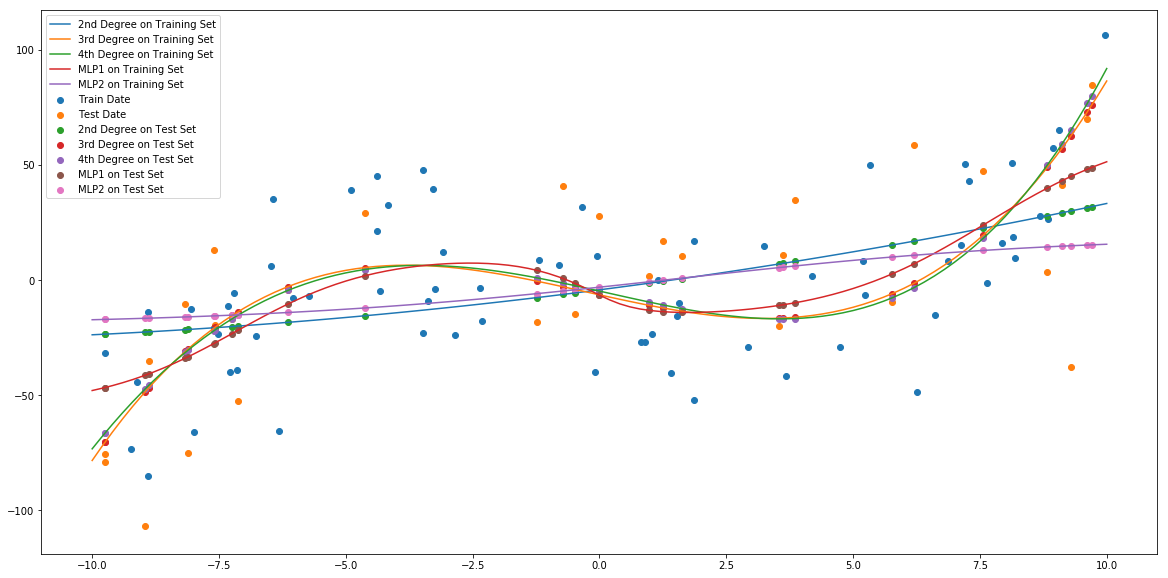

In [260]:
mlp_1.fit(x_train, y_train)
y_pred_mlp_1 = mlp_1.predict(x_test)
mlp_2.fit(x_train, y_train)
y_pred_mlp_2 = mlp_2.predict(x_test)

from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_2 = poly2.fit_transform(x_train)
lin2 = LinearRegression(normalize=True)
lin2.fit(x_2, y_train)
y_pred2 = lin2.predict(poly2.fit_transform(x_test))
mse = mean_squared_error(y_test, y_pred2)
mse2 = mean_squared_error(y_train, lin2.predict(x_2))
print('Second Degree Polynomial on train data:',mse2)
print('Second Degree Polynomial on test data:',mse)

poly3 = PolynomialFeatures(degree=3)
x_3 = poly3.fit_transform(x_train)
lin3 = LinearRegression(normalize=True)
lin3.fit(x_3, y_train)
y_pred3 = lin3.predict(poly3.fit_transform(x_test))
mse = mean_squared_error(y_test, y_pred3)
mse2 = mean_squared_error(y_train, lin3.predict(x_3))
print('Third Degree Polynomial on train data:',mse2)
print('Third Degree Polynomial on test data:',mse)

poly4 = PolynomialFeatures(degree=4)
x_4 = poly4.fit_transform(x_train)
lin4 = LinearRegression(normalize=True)
lin4.fit(x_4, y_train)
y_pred4 = lin4.predict(poly4.fit_transform(x_test))
mse = mean_squared_error(y_test, y_pred4)
mse2 = mean_squared_error(y_train, lin4.predict(x_4))
print('Fourth Degree Polynomial on train data:',mse2)
print('Fourth Degree Polynomial on test data:',mse)


mlp_2.predict(y_test)
print('MLP_1 MSE Train:',mean_squared_error(y_train, mlp_1.predict(x_train)))
print('MLP_1 MSE Test:',mean_squared_error(y_test, y_pred_mlp_1))
print('MLP_2 MSE Train:',mean_squared_error(y_train, mlp_2.predict(x_train)))
print('MLP_2 MSE Test:',mean_squared_error(y_test, y_pred_mlp_2))

plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.scatter(x_train, y_train, label='Train Date')
plt.scatter(x_test, y_test, label='Test Date')
# plt.plot(x_test, y_pred, 'blue', marker='o')
plt.plot(x_all, lin2.predict(poly2.fit_transform(x_all)), label='2nd Degree on Training Set')
plt.plot(x_all, lin3.predict(poly3.fit_transform(x_all)), label='3rd Degree on Training Set')
plt.plot(x_all, lin4.predict(poly4.fit_transform(x_all)), label='4th Degree on Training Set')
plt.plot(x_all, mlp_1.predict(x_all), label='MLP1 on Training Set')
plt.plot(x_all, mlp_2.predict(x_all), label='MLP2 on Training Set')
plt.scatter(x_test, lin2.predict(poly2.fit_transform(x_test)), label='2nd Degree on Test Set')
plt.scatter(x_test, lin3.predict(poly3.fit_transform(x_test)), label='3rd Degree on Test Set')
plt.scatter(x_test, lin4.predict(poly4.fit_transform(x_test)), label='4th Degree on Test Set')
plt.scatter(x_test, mlp_1.predict(x_test), label='MLP1 on Test Set')
plt.scatter(x_test, mlp_2.predict(x_test), label='MLP2 on Test Set', linestyle='-')
plt.legend()
plt.show()
#xtest as well

(c) 

Answer: My third degree polynomial regression model performed the best on the test set while my fourth degree polynomial model performed best on the training data, but both had relatively similar MSE's for both training and testing data. It appears that the fourth degree polynomial was chasing too much noise and thus had higher variance and lower bias. My third degree polynomial model, on the other hand, decreased the true loss by finding a happy middle ground between bias and variance. That makes sense as the scatter plot resembles a cubic function, having one peak and one trough. It also makes sense that my third degree polynomial function performed the best since there was not much data and it is less complex than the fourth degree model. 

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [4]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (3)
#use - 
#for num_data_points in range(20, 1001):

#for 4) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [219]:
w_true = np.arange(10)+1
x = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))
y = np.matmul(x, w_true) + e
len(y)

100

2.

In [222]:
lin_model = LinearRegression()
model = lin_model.fit(x,y)
mean_squared_error(y, model.predict(x))

0.9237749453438213

3.

Minimum MSE: 412    1.076093
dtype: float64


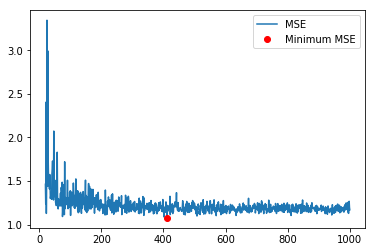

In [190]:
w_true = np.arange(10)+1
x_test = np.random.uniform(size=(50, 10))
e = np.random.normal(size=(50))
y_test = np.matmul(x_test, w_true) + e

results = []
count = []
dic = {}
for num_data_points in range(20, 1001):
    e = np.random.normal(size=(num_data_points))
    w_true = np.arange(10)+1
    x_train = np.random.uniform(size=(num_data_points, 10))
    y_train = np.matmul(x_train, w_true) + e
    lin_model = LinearRegression()
    model = lin_model.fit(x_train,y_train)
    mse = mean_squared_error(y_test, model.predict(x_test))
    dic[num_data_points] = mse
    
df = pd.Series(dic)
# plt.plot(df)
mask = (df == df.min())
ax = plt.subplot()
ax.plot(df, label='MSE')
plt.plot(df[mask], 'ro', label='Minimum MSE')
plt.legend()
print('Minimum MSE:', df[mask])

4. 

In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted  𝑦  and the true  𝑦  which is commonly used. Hence,  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)=1𝑛𝑢𝑚_𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠∑𝑛𝑢𝑚_𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠𝑖=1(𝜃𝑖−𝜃̂ 𝑖)2  where  𝜃𝑖  are the true coefficients and  𝜃̂ 𝑖  are the estimated coefficients. Using the  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  as the metric, about how many data points are required to have  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate  𝑥  which is 3 dimensional (instead of 10 dimensional as before) and the corresponding  𝑦  for each  𝑥 . In this case, when  𝑥  is three dimensional, how many data points are required to have  𝑀𝑆𝐸(𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠)  < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)

In [223]:
w_true = np.arange(10)+1
x_test = np.random.uniform(size=(50, 10))
e = np.random.normal(size=(50))
y_test = np.matmul(x_test, w_true) + e

results = []
count = 0
dic = {}
while count < 10:
    for num_data_points in range(20, 1001):
        e = np.random.normal(size=(num_data_points))
        w_true = np.arange(10)+1
        x_train = np.random.uniform(size=(num_data_points, 10))
        y_train = np.matmul(x_train, w_true) + e
        lin_model = LinearRegression()
        model = lin_model.fit(x_train,y_train)
        mse = mean_squared_error(w_true, model.coef_)
        dic[num_data_points] = mse
        if mse < 0.01:
            results.append(num_data_points)
            count += 1
            break
print('10 Dimensional average number of data points where MSE was less than 0.01:\n',sum(results)/10,'\n')

w_true = np.arange(10)+1
x_test = np.random.uniform(size=(50, 10))
e = np.random.normal(size=(50))
y_test = np.matmul(x_test, w_true) + e

results = []
count = 0
dic = {}
while count < 10:
    for num_data_points in range(20, 1001):
        e = np.random.normal(size=(num_data_points))
        w_true = np.arange(3)+1
        x_train = np.random.uniform(size=(num_data_points, 3))
        y_train = np.matmul(x_train, w_true) + e
        lin_model = LinearRegression()
        model = lin_model.fit(x_train,y_train)
        mse = mean_squared_error(w_true, model.coef_)
        dic[num_data_points] = mse
        if mse < 0.01:
            results.append(num_data_points)
            count += 1
            break
print('3 Dimensional average number of data points where MSE was less than 0.01:\n',sum(results)/10)

10 Dimensional average number of data points where MSE was less than 0.01:
 324.7 

3 Dimensional average number of data points where MSE was less than 0.01:
 78.2


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)


Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


### Answer

In [194]:
dataset = pd.read_csv('q3_dataset.csv')

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

x_new = X.drop(['PolicBudgPerPop'], axis=1)
x_new = x_new.drop(['PolicCars'], axis=1)
x_new['population'].fillna(value=x_new['population'].mean(), inplace=True)
x_new['householdsize'].fillna(value=x_new['householdsize'].mean(), inplace=True)
x_new['numbUrban'].fillna(value=x_new['numbUrban'].mean(), inplace=True)
x_new['PctUnemployed'].fillna(value=x_new['PctUnemployed'].mean(), inplace=True)
x_new['PctEmploy'].fillna(value=x_new['PctEmploy'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x_new,Y,test_size = 0.30, random_state=11)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
print('Drop 2 columns and fill with mean, MSE:',mean_squared_error(y_test, y_pred))

Drop 2 columns and fill with mean, MSE: 0.03575499678392482


In [200]:
dataset = pd.read_csv('q3_dataset.csv')

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

x_new = X
x_new['PolicCars'].fillna(value=x_new['PolicCars'].mean(), inplace=True)
x_new['PolicBudgPerPop'].fillna(value=x_new['PolicBudgPerPop'].mean(), inplace=True)
x_new['population'].fillna(value=x_new['population'].mean(), inplace=True)
x_new['householdsize'].fillna(value=x_new['householdsize'].mean(), inplace=True)
x_new['numbUrban'].fillna(value=x_new['numbUrban'].mean(), inplace=True)
x_new['PctUnemployed'].fillna(value=x_new['PctUnemployed'].mean(), inplace=True)
x_new['PctEmploy'].fillna(value=x_new['PctEmploy'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x_new,Y,test_size = 0.30, random_state=11)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
print('Fill with mean, MSE:',mean_squared_error(y_test, y_pred))

Fill with mean, MSE: 0.035335626268888705


In [204]:
dataset = pd.read_csv('q3_dataset.csv')

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

x_new = X
x_new.fillna(0, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x_new,Y,test_size = 0.30, random_state=11)
lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
print('Fill with zero, MSE:',mean_squared_error(y_test, y_pred))

Fill with zero, MSE: 0.03530483698748854


In [205]:
drop_rows = dataset.dropna()
x = drop_rows.drop(['ViolentCrimesPerPop'],axis=1)
y = drop_rows['ViolentCrimesPerPop']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.30, random_state=11)
lin_drop = LinearRegression()
lin_drop.fit(X_train, Y_train)
y_pred = lin_drop.predict(X_test)
print('Drop all rows with NaN MSE:',mean_squared_error(Y_test, y_pred))

Drop all rows with NaN MSE: 0.047526237457769516


I am not too sure why filling NaN values with zero returned the lowest MSE. My only guess is that it if a column had lots of missing values then it was not statistically significant as a predictor. Thus, filling those missing values with zero made made it more irrelevant to the regression. Filling all missing values with the mean of the column returned a similar MSE. It makes since why this performs well as it allows for all of the missing values to be represented by the average. 

# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: False. While it is true that PCA creates a lower-dimensional representation with principal components, PCA does not seek to predict an output variable as it is an unsupervised learning technique and does not have a target variable. The goal of PCA is to find common factors across multiple dimensions, in forms of linear combinations of the variables, and to then rank those components according to their importance. 